# Informatics 1 Cognitive Science - Assignment 2

------------------------

## Academic misconduct

This assignment is intended to be completed individually. Please make sure you are familiar with the [school's academic misconduct policy](http://web.inf.ed.ac.uk/infweb/admin/policies/academic-misconduct).

## Answering questions

The assignment notebooks include a combination of instructions, code that has been written for you to use, run, or examine, and questions you need to answer.

### Code

In every place where you need to write code you will see:

    # YOUR CODE HERE

Delete any raise NotImplementedError() (if applicable) and write your solution code inside the marked cell.

In general, you should write your solutions so the notebook can be run from start-to-finish, from scratch. To check this, you can open the "Kernel" menu above and select "restart and run all". This will restart the kernel and run all cells from first to last.

### Text

For questions that require you to write text the cell will say `YOUR ANSWER HERE`. Again delete that line if you want to answer the question and write your response in the marked cell.

Most of the cells that already contained text or calculations will be read-only. You can open new cells for additional calculation or notes, but please try to give answers in the requested cells wherever possible.


## Marking

Please consult the [Common Marking Scheme](https://web.inf.ed.ac.uk/infweb/student-services/ito/students/common-marking-scheme) for information how we mark coursework. In particular note that a mark above 75% requires the following: *Connections have been made both within and beyond the brief. Learning can be applied to unfamiliar situations or problems and may extend current theory. It is questioning, speculative and reflective.* 

This will be assessed, in part, using your text answers, so please pay attention to these, and not just the coding parts. In the text answers we will be looking for evidence of sound understanding of the subject matter. Marks above 80% document evidence of original, independent thinking. In other words, think about relevant context when giving your answers, but remain focussed on the question. Remember, it's quality, not quantity, that matters for a good answer. Also note that we will not mark your coding style. Any coding question will receive full marks if it produces the requested result.

In [22]:
# imports required for all tasks

# import numpy, the python scientific package
import numpy as np

# test images from scipy
from scipy import misc

# import maplotlib to plot the visualizations
from matplotlib import pyplot as plt
#this is to output the plots in the notebook
%matplotlib inline

# Let's also hide unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

In [23]:
from scipy.signal import convolve2d

# Part 1
## Similarity-based models of categorization. (25 points)

In [24]:
# Here we use the following functions:

def similarity(x,y,c):
    return np.exp(-c*np.sum(np.power((x-y),2)))

def similarityToAll(x,yM,c):
    xM=np.tile(x,[np.size(yM,axis=0),1])
    sqDiff = np.power(xM-yM,2)
    ssDiff=np.sum(sqDiff,axis=1)
    return np.exp(-c*ssDiff)

def model1(testCase,cat1,cat2,c):
    c1s = np.sum(similarityToAll(testCase,cat1,c))
    c2s = np.sum(similarityToAll(testCase,cat2,c))
    return c1s/(c1s+c2s)

def model2(testCase,cat1,cat2,c):
    c1s = similarity(testCase,np.average(cat1,axis=0),c)
    c2s = similarity(testCase,np.average(cat2,axis=0),c)
    return c1s/(c1s+c2s)


<div class="alert alert-info" role="alert">
<h1>Exercise 1a)</h1>
<p>
First, let's understand what $c$ does -- it's a parameter we can adjust to change the way our similiarity function behaves. Suppose we have three examples, x1=[1, 1], x2=[1,0], and x3=[1,3].

1. What happens to the relative similarity of x1 to x2 and x3 as we let c become very large? (1 point)
2. What happens if we let c become very close to zero? (1 point)
3. Why shouldn't we let c be negative? (1 point)
    
(3 points total)
</p>
</div>


1. As we let c get very large, the similarity is scaled down and tends towards zero. 
2. As c gets close to zero, the similarity approaches 1, implying all xs and ys are identical objects, which may not necessarily be the case.
3. If we let c become negative, we get a similarity greater than 1 (identical), which does not make sense. 

<div class="alert alert-info" role="alert">
<h1>Exercise 1b)</h1>
<p>
    
Second, let's look at some simple models. Two functions in the block above, model1 and model2, describe minimal versions of categorization models we have discussed in lecture.

4. Which categorization model does model1 best correspond to? Explain. (2 points)
5. Which categorization model does model2 best correspond to? Explain. (2 points)

(4 points total)    
</p>
</div>


4. Model 1 corresponds to a exemplar-based model of categorisation, as it works by calculating the sum of the test case's similarities to all objects in a category. Once this similarity is calculated, the probability of the test case belonging to one category rather than another is calculated.

5. Model 2 corresponds to a prototype-based model of categorisation, as it works by calculating the similarity of the test case to a "prototype;" a summary representation for the category. The prototype is in this case taking as an object whose attributes are the average of all objects in the category. Once this similarity is calculated, the probability of the test case belonging to one category rather than another is calculated.


Third, let's consider the problem of categorizing a new creature, named Bob, as a wimble or as a womble. The only features our creatures can have are volume and mass; a creature with a volume of $1cm^3$ and a mass of $2g$  can be described as [1 2].

The next block describes previously-observed wimbles and wombles in terms of these features, as well a new creature, which we will call Bob. For the rest of these questions, assume $c=0.1$.


In [25]:
wimbles = np.matrix([[1,1],[1,1],[1,1],[1,1],[1,10],[1,10],[1,10],[1,10]])
wombles = np.matrix([[1,5.01],[1,5.02],[1,5.03],[1,5.04],[1,5.05],[1,5.06],[1,5.07],[1,5.08]])

bob = np.array([1,5.5])

<div class="alert alert-info" role="alert">
<h1>Exercise 1c)</h1>
<p>
 
6. Does Model 1 classify Bob as a wimble or a womble? Why? (3 points)
7. Does Model 2 classify Bob as a wimble or a womble? Why? (3 points)
8. Suppose we next see 9 more groups of wimbles, all identical to the group above. What changes in the models' predictions? Explain. (3 points)
9. Is it *reasonable* for the predictions to change if we see many more examples of one category than another? Explain. (3 points)
    
(12 points total)
</p>
</div>


In [26]:
c = 0.1
#Before additional wimbles.
Bob_prob_wimble_exemplar_theory = model1(bob, wimbles, wombles,c)
if Bob_prob_wimble_exemplar_theory > 0.5:
    Bob_cat_exemplar_theory = "wimble"
elif Bob_prob_wimble_exemplar_theory < 0.5:
    Bob_cat_exemplar_theory = "womble"
elif Bob_prob_wimble_exemplar_theory == 0.5:
    Bob_cat_exemplar_theory = "wimble or womble"
        
Bob_prob_wimble_prototype_theory = model2(bob, wimbles, wombles,c)
if Bob_prob_wimble_prototype_theory > 0.5:
    Bob_cat_prototype_theory = "wimble"
elif Bob_prob_wimble_prototype_theory < 0.5:
    Bob_cat_prototype_theory = "womble"
elif Bob_prob_wimble_prototype_theory == 0.5:
    Bob_cat_prototype_theory = "wimble or womble"

print("Prediction of exemplar theory: " + Bob_cat_exemplar_theory)
print("Prediction of prototype theory: " + Bob_cat_prototype_theory)

#After additional wimbles.

morewimbles = np.repeat(wimbles, 10, axis = 0)

Bob_prob_wimble_exemplar_theory = model1(bob, morewimbles, wombles,c)
if Bob_prob_wimble_exemplar_theory > 0.5:
    Bob_cat_exemplar_theory = "wimble"
elif Bob_prob_wimble_exemplar_theory < 0.5:
    Bob_cat_exemplar_theory = "womble"
elif Bob_prob_wimble_exemplar_theory == 0.5:
    Bob_cat_exemplar_theory = "wimble or womble"
        
Bob_prob_wimble_prototype_theory = model2(bob, morewimbles, wombles,c)
if Bob_prob_wimble_prototype_theory > 0.5:
    Bob_cat_prototype_theory = "wimble"
elif Bob_prob_wimble_prototype_theory < 0.5:
    Bob_cat_prototype_theory = "womble"
elif Bob_prob_wimble_prototype_theory == 0.5:
    Bob_cat_prototype_theory = "wimble or womble"

print("Prediction of exemplar theory with more wimbles: " + Bob_cat_exemplar_theory)
print("Prediction of prototype theory with more wimbles: " + Bob_cat_prototype_theory)


Prediction of exemplar theory: womble
Prediction of prototype theory: wimble
Prediction of exemplar theory with more wimbles: wimble
Prediction of prototype theory with more wimbles: wimble


6. The exemplar-based model (model 1) classifies Bob as a womble since Bob's mass is closer to the masses of each individual Womble than each individual Wimble. Since the mass is the only differentiating feature between wimbles and wombles, when the model calculates the sum of similarities to each wimble or womble, it finds a greater value for the wombles. So, when it calculates the probability that Bob is a wimble rather than a womble, it returns a value lesser than 0.5, thereby classifying Bob as a womble.


7. The prototype-based model (model 2) predicts that Bob is a wimble since Bob is identical to the prototypical average wimble. The average wimble in the wimbles matrix is [1, 5.5], which matches identically to Bob. Therefore, when the model computes the similarity of bob to the average wimble, it obtains a value of 1. Since the average womble is not [1, 5.5], the calculated similarity for wombles will be less than 1. So, when the model calculates the probability that Bob is wimble rather than a womble, it returns a value greater than 0.5, thereby classifying Bob as a wimble.


8. If we see 9 more wimbles, the prediction of the prototype-based theory (model 2) does not change whereas the prediction of the exemplar-based theory (model 1) theory changes from wombles to wimbles. Model 2's prediction does not change since the average wimble in the bigger set is still [1, 5.5], which is identical to Bob, unlike the average womble. Model 1's prediction changes because the sum of all the similarities to the set of wimbles increases to a value above the sum of all the similarities to the set of wombles, since there are now far more wimbles which contribute to this sum. This results in the probability of Bob being a wimble rather than a womble increasing above 0.5, so the model classifies Bob as a wimble.


9. Sanborn et. al theorised that people are more likely to categorise items as being part of groups which have more items. This is based upon the observation that most things fall into bigger groups. Mathematically, this can be expressed as the probability that an item $ z $ falls into a group $k$ scaling with the number of items in group $N_k$ ($ P(z = k) \propto N_k $). Model 1 accurately replicates this theory.

<div class="alert alert-info" role="alert">
<h1>Exercise 1d)</h1>
<p>
    
Finally, let's consider some of the shortcomings of these models.

Suppose someone is playing a minimalist video game, and so far has only encountered the wimbles and wombles listed above. They are asked to make a judgement about what Bob is, without being given any guidance or restrictions about Bob's category or knowing what categories exist in the game.

10. What is one way both models above fail to account for human category judgments in this scenario, in terms of the kinds of information people consider, the judgments they make, and/or how they represent categories? Where possible, discuss specifics of the current example. (3 points)

11. In addition to the first failure, name a second one that a model in the Sanborn et al. paper fixes. That is, a problem faced by Model 1 or Model 2 above, but not (either) the MAP model or the particle filter in the Sanborn paper discussed in lecture. Explain. (3 points)

(6 points total)
</p>
</div>

10. Both models would fail to consider the scenario that Bob is an anamolous case. For example, suppose Bob's volume and mass more closely resemble that of a wimble, and is therefore predicted to be one by the similarity-based models above. However, it may be that Bob is actually a womble born with a genetic defect that makes him have wimble-like attributes, although in reality he is still a womble. The models would incorrectly classify Bob in this scenario, they fail to consider "hidden variables" unlike a theory-based approach of categorisation.


11. If we present either model with an item which is neither a wimble or a womble, it will still classify that object as one of the two. In other words, it relies on an existing approximate solution of which groups exist. On the other hand, a local MAP model is an effective method of dealing with objects of a new type. If a local MAP finds that the new item is more likely to be something else than a wimble or a womble, it will classify the item into a new unique group.  

# Part 2
## Simple neuron models. (25 points)

The code below simulates two neuron models. Each neuron receives the same input current $I(t)$, which here is random and drawn from a Gaussian distribution.

Your task is to compare these models.

You can run the cell and modify the code to inspect the two models. The code does not have to be in its original form when you submit, only the answers below will be marked.

(0.6713385585715156, 0.9286734887354713)

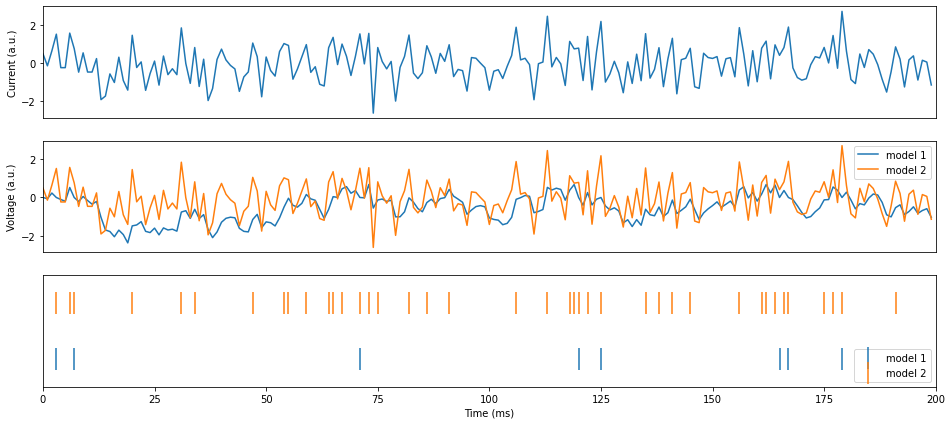

In [27]:
# Simulation parameters

# simulation time (in milliseconds)
t_max = 200

# input current
np.random.seed(42) # fix random seed
I = np.random.normal(size=t_max)

# Spike threshold
threshold = 0.75

# Plot the input current
plt.figure(figsize=(16,7))
plt.subplot(311)
plt.plot(I)
plt.xlim(0,t_max)
plt.xticks(())
plt.ylabel('Current (a.u.)')

# Voltage and spikes for model 1
V1 = np.zeros(t_max)
spikes1 = []
for t in range(1,t_max):
    V1[t] = V1[t-1] + 1/10 * (-V1[t-1] + 4.46*I[t]) 
    # aside: the factor 4.46 in the line above was added 
    # to make V1 and V2 have approx. the same variance (when there are no spikes)
    if V1[t]>threshold:
        spikes1.append(t)
        V1[t] = 0

# Compute voltage and spikes for model 2
V2 = I
spikes2 = np.where(V2>threshold)[0]

# Neuron activation (voltage) for both models
plt.subplot(312)
plt.plot(V1, label='model 1')
plt.plot(V2, label='model 2')
plt.xlim(0,t_max)
plt.xticks(())
plt.ylabel('Voltage (a.u.)')
plt.legend()

# Spike trains generated by both models
plt.subplot(313)
plt.scatter(spikes1, np.zeros(len(spikes1)), marker='|', s=500, label='model 1')
plt.scatter(spikes2, np.ones(len(spikes2)), marker='|', s=500, label='model 2')
plt.xlim(0,t_max)
plt.ylim(-.5,1.5)
plt.yticks(())
plt.xlabel('Time (ms)')
plt.legend()
np.std(V1), np.std(V2)

<div class="alert alert-info" role="alert">
<h1>Exercise 2a)</h1>
<p>
Explain how these models work and state the equations.
    
(8 points)
</p>
</div>

Model 1 replicates an "integrate and fire" neuron. In this model of a neuron, the action potential across a neuron depends on its previous activity as well as the net external input current. This potential $V$ at time $t$ can be expressed mathematically as:

$ V(t) = V(t-1) + \frac{\Delta t}{\tau}[V_{rest} - V(t-1) + I_{ext}(t)] $.

Where $\Delta t$ is the measured timestep (1ms in this case), $\tau$ is the membrane time constant (10 in this case), $V_{rest}$ is the resting potential of the neuron (0V in this case) and $I_{ext}$ is the net external current (a factor of 4.46 is added in model 1 so that the stdev of models 1 and 2 is approximately the same. When $V(t) > V_{thr}$, the threshold voltage, the a potential spike is generated and the neuron fires. Then, one timestep after the spike, the neuron's voltage is reset to the resting potential; $V(t+1) = V_{rest}$.

Model 2 may represent a McCullouch Pitts neuron. Such a neuron takes a weighted sum of all of its synaptic inputs, and spikes if this sum is greater than the threshold. We can assume that the net input current $I_{ext}$ into the neuron here is equal to this weighted sum. The activity $A$ of this neuron can thus be expressed mathematically as:

$ A = \theta(\Sigma_iw_iI_i - \mu) = \theta(I_{ext} - \mu)$

$\theta(x) = \left \{ \begin{array}{ll}
1 & x \geq \mu\\
0 & x < \mu
\end{array} \right. $

where $w_i$ is the weight of the ith input, $I_i$ is the input current from the ith input and $\mu$ is the threshold.

<div class="alert alert-info" role="alert">
<h1>Exercise 2b)</h1>
<p>
Explain how the spiking differs between the two models, and explain which components of the model cause those differences.
    
(8 points)
</p>
</div>

Model 2 spikes far more frequently than model 1. This is because model 2 spikes whenever the net external current exceeds the threshold, since the net input current is equal to the neuron's action potential in this case. However, since the voltage across the neuron modelled by model 1 decays over time for a fixed net external current, it requires a sharp and significant increase in net input current in order to spike or multiple less significant jumps in net input current which occur in close succession.

<div class="alert alert-info" role="alert">
<h1>Exercise 2c)</h1>
<p>
Explain which aspects of the activity of real neurons are captured by each model, and which are missing.
    
(9 points)
</p>
</div>

Model 1 correctly depicts the decaying and voltage resetting of action potential and the tendency to spike above a certain threshold potential, but fails to depict a neuron spike as a spike in action potential. For a fixed external current (or no external current), the action potential of a real neuron decays over time, tending towards a resting voltage (0v in the case of model 1). Model 1 correctly depicts this. Also, when a spike does occur, a real neuron's action potential will reset to a reset voltage (0v in the case of model 1), as the model depicts. Additionally, model 1 correctly depicts the fact that a real neuron only spikes when its action potential exceeds a threshold voltage. However, when a real neuron spikes, there is also a brief sharp spike in action potential across the neuron before the potential resets. Model 1 does not depict this, and only represents spikes as the moments in time when the action potential exceeds the threshold.

Model 2 correctly depicts the tendency of a neuron to spike above a threshold action potential, but fails to depict the decaying and voltage resetting behaviour of action potential, and a neuron spike as a spike in action potential. Just like a real neuron, the neuron modelled by model 2 only spikes when the action potential exceeds a certain threshold. The action potential of the neuron depicted by model 2 is simply equal to the net external current, so there is no decaying behaviour as a real neuron would have and there is no voltage resetting after a spike as a real neuron would do. Additionally, the action potential does not spike when the threshold is exceeded as a real neuron would.

# Part 3
## Receptive fields in the visual system. (25 points)

In this exercise we will explore receptive field models of neurons in the visual system. Specifically, here we will look at the spatial filtering neurons perform, and ignore the temporal aspects. Then we can define the receptive field of a neuron as a matrix of weights that scale each pixel, before the output is computed by summing the weighted pixels.

The following code creates three different receptive fields. Again, you may modify this to explore and understand the models. Questions are below.

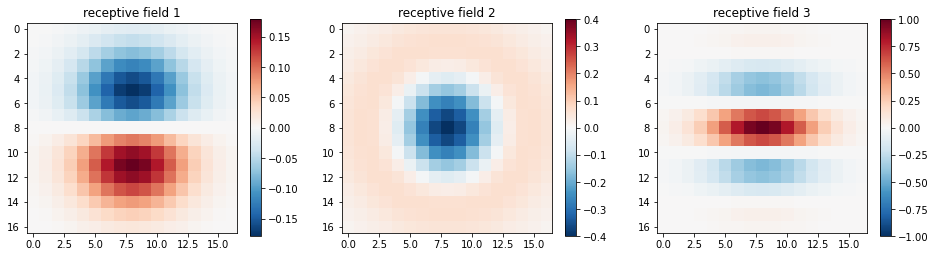

In [28]:
x = np.tile(np.arange(-8,9),(17,1))
y = x.T 
s1=3
s2=4

# the first kernel
kernel1 = np.exp(-(x*x+y*y)/(2*s1**2))*np.sin(y/10)


# the second kernel
kernel2 = -np.exp(-(x*x+y*y)/(2*s1**2)) + 0.6*np.exp(-(x*x+y*y)/(2*s2**2))


# the third kernel
kernel3 = np.exp(-(x*x+y*y)/(2*s1**2))*np.cos((x.T/1.25+np.cos(np.pi/2)*y[:,0]))

# plot the kernels
plt.figure(figsize=(16,4))
for i,kernel in enumerate((kernel1,kernel2,kernel3)):
    plt.subplot(1,3,i+1)
    maxv = np.max((np.abs(np.min(kernel)), np.max(kernel)))
    plt.imshow(kernel, cmap=plt.cm.RdBu_r, vmin=-maxv, vmax=maxv)
    plt.colorbar()
    plt.title('receptive field {}'.format(i+1))


<div class="alert alert-info" role="alert">
<h1>Exercise 3a)</h1>
<p>
Describe the three receptive fields shown above. State which cell type each receptive field best matches, and where in the visual these cells are found. Which feature in an image most strongly excites each cell type, and which features yield the weakest response?
    
(12 points)
</p>
</div>

Receptive field 1 is formed by V1 simple cells, which are found in the primary visual cortex. The strongest response from receptive field 1 should be yielded by top edges in an image with a horizontal (or approximately so) orientation. The weakest response should be obtained by regions of an image which are directly below a horizontal edge.

Receptive field 2 may be formed by off-centre LGN cells, which are found in the lateral geniculate nucleus, or by off-centre retinal ganglion cells, found in the retina. The strongest response from receptive field 2 should be yielded when a low stimuli region in an image is surrounded by stimuli in an image. The weakest response from receptive field 2 should be yielded when stimuli is present in the centre but absent in the surroundings.

Receptive field 3 is also formed by V1 simple cells, which are found in the primary visual cortex. The strongest response from receptive field 1 should be yielded by top or bottom edges in an image with a horizontal (or approximately so) orientation. The weakest response should be obtained by vertical bars of edges.

<div class="alert alert-info" role="alert">
<h1>Exercise 3b)</h1>
<p>
    Now test your intuition what filtering these receptive field perform by computing the responses of these neurons to a natural image. To this end we assume we have as many neurons as pixels in the image, and the centre locations of the receptive fields match the pixel locations. Then we can use a simple convolution operation to predict the response of each neuron.
    
Show the predicted responses for each receptive field. Use an appropriate colour scale (use a diverging colormap with the zero clearly visible, as above), to indicate positive and negative responses.
    
(5 points)
</p>
</div>

SHOULD USE THE convolve2d function from scipy.signal:

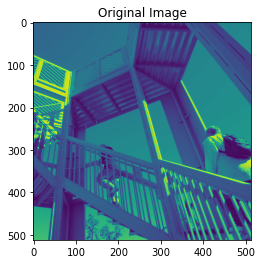

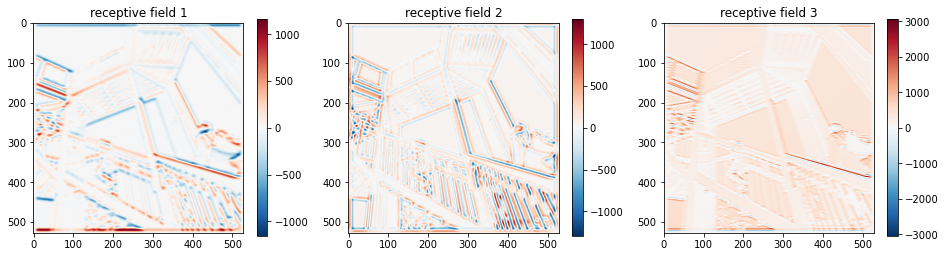

In [29]:
# YOUR CODE HERE

#Import test image as 2d matrix:

image = misc.ascent()
plt.figure()
plt.imshow(image)
plt.title('Original Image')


plt.figure(figsize=(16,4))
for i,kernel in enumerate((kernel1,kernel2,kernel3)):
    plt.subplot(1,3,i+1)
    filteredimage = convolve2d(image, kernel)
    maxv = np.max((np.abs(np.min(filteredimage)), np.max(filteredimage)))
    plt.imshow(filteredimage, cmap=plt.cm.RdBu_r, vmin=-maxv, vmax=maxv)
    plt.colorbar()
    plt.title('receptive field {}'.format(i+1))

<div class="alert alert-info" role="alert">
<h1>Exercise 3c)</h1>
<p>
Describe and explain your results. Are the receptive fields indeed selective to the image features you predicted above? Why do neurons in the visual system respond in this way?
    
(8 points)
</p>
</div>

As expected, receptive field 1 responds to edges and bars the most, as shown by the colourbar. However, the prediction that it would respond to top edges specifically does not seem to be accurate. As expected, receptive field 2 responds most to features that are surrounded by other stimuli. This is shown clearly in the vertical bar in the centre of the image; the response to the centre of the bar, which is surrounded by the rest of the bar around it, is highly inhibited. Receptive field 3 did not respond as expected, and rather returns an excited response to the majority of the image.

# Part 4
## A memory model. (25 points)

Here you will simulate the Hopfield model. This model simulates $M$ binary neurons with the following activity rule:

$$
\begin{eqnarray*}
s_{i}(t+1) & = & \Theta\left(\sum_{j=1}^{M}w_{ij}s_{j}(t)-\theta_{i}\right)\\
\Theta(a) & = & \begin{cases}
1 & a\geq0\\
0 & a<0
\end{cases}
\end{eqnarray*}
$$

The variable $s_i(t)$ is the activity of neuron $i$ at time $t$, and $w_{ij}$ is a weight matrix connecting the neurons. In the following we set the bias $\theta_{i}=0$.

The following learning rule is used to store a set of $N$ binary patterns $p_i^n\in\{0,1\}$ in this network:

$$w_{ij} = \frac{1}{N} \sum_{n=1}^N (p^n_{i}-s)(p^n_{j}-s)$$

The quantity $s$ is the sparseness of the patterns, which is the fraction of elements in the patterns that are 1. So if a pattern of length 20 contains 10 times the '0' and 10 times '1', $s=0.5$.

In other words, sparseness is the arithmentic mean (average) over all patterns: $s=<p^n>_N$.

An excellent summary of the Hopfield network is in chapter 42 in the following textbook (free online):
*MacKay, D. J. C. (2003). [Information Theory, Inference, and Learning Algorithms](http://www.inference.org.uk/mackay/itila/)*

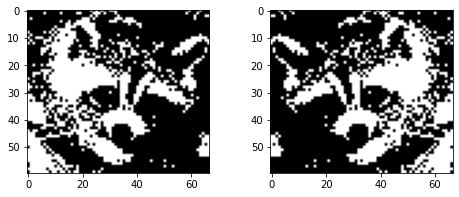

In [30]:
# Let's create a binary pattern to store, here we use a racoon:

image = misc.face(gray=True)[:600:10,280:950:10]>140
pattern = image.flatten().astype(int)

plt.figure(figsize=(8,3))
plt.subplot(121)
plt.imshow(image, cmap=plt.cm.gray)

# We also use the mirror image of the same racoon

image2 = image[:,::-1]
pattern2 = image2.flatten().astype(int)

plt.subplot(122)
plt.imshow(image2, cmap=plt.cm.gray)

0.04129353233830846
0.0
0.0
0.0
0.0
0.0


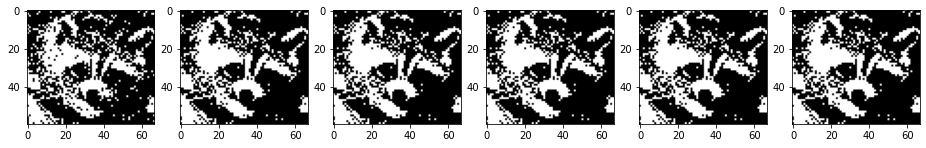

In [31]:
# Now analyse the following code
# feel free to change it to experiment, the code is not part of the submission, only the answers below
# best make a copy of the original cell so you can go back after you made changes

# parameters
N = 2 # number of patterns
M = pattern.shape[0] # number of neurons
sparseness = np.sum(pattern)/len(pattern)
bias = 0.3 # theta
T = 5 # number of time steps

# plotting
fig, ax = plt.subplots(T//6+1,6, figsize=(16,(T//6+1)*3))
ax = ax.flatten()


# part 1
w = np.random.randn(M,M)# random initialisation
w += np.outer(pattern-sparseness, pattern-sparseness)
pattern2 = image[:,::-1].flatten().astype(int)
w += np.outer(pattern2-sparseness, pattern2-sparseness)
w = w/N

# part 2
np.random.seed(42)
s = np.copy(pattern)
corrupt = np.random.rand(M)>0.9# weight
s[corrupt] = pattern2[corrupt]
#Initial mean square error. 
print(np.sum((s-pattern)**2)/len(pattern))
ax[0].imshow(s.reshape(image.shape),cmap=plt.cm.gray)

# part 3
for t in range(T):
    s = (0.5 + 0.5 * np.sign((w @ s) - bias)).astype(int)
    ax[t+1].imshow(s.reshape(image.shape),cmap=plt.cm.gray)
    print(np.sum((s-pattern)**2)/len(pattern))


<div class="alert alert-info" role="alert">
<h1>Exercise 4a)</h1>
<p>Briefly describe in words what this program computes. Address the code in parts 1, 2 and 3 in turn in your description. Do not yet consider the output. What type of memory is simulated here?

(6 points)
</p>
</div>

Auto-associative memory is being simulated. 

Part 1 first generates a square matrix of random weights whose numbers of columns and rows equals the number of neurons. It then adds to this matrix the weights $w_{ij} as calculated by the equation above, which is the product of the variation of each pixel's binary value to the average binary value (sparseness) of all pixels to every other pixel's variation from the sparseness. It then divides these weights by the number of neurons.

Part 2 generates a test image by copying the original image of the racoon and corrupting it as a mixture of the left facing and right facing images of the racoon. The weight factor adjusts what weight of the left facing racoon that is added to the test image. It then prints the initial mean square error of this image from the original racoon image and plots this image.

Part 3 then uses the hopfield algorithm using the weights generated in part 1 to reconstruct and plot the new image using the test image, and prints the new mean square error of each new iteration of the image from the original.

<div class="alert alert-info" role="alert">
<h1>Exercise 4b)</h1>
<p>Now look at the output this code generates (text and graphs). How do you interpret these?
    
(6 points)
</p>
</div>

The text displays the mean square error of each iteration of the image as the model is applied. The lower this value is, the more similar the image is to the original. Excluding the first graph, which displays the initial corrupted test image, each subsequent graph displays the image generated by the memory model after each iteration. 

<div class="alert alert-info" role="alert">
<h1>Exercise 4c)</h1>
<p>What happens when you change the relative weight of the test pattern (the line marked with weight in the code)? 
    
(6 points)
</p>
</div>
 

The weight adjusts the weight of the original image of the racoon to the inverted image of the racoon in the corrupted test image. For values $\leq 0.3$, the test image resembles a left facing racoon, and the memory model recreates a left-facing racoon. For values $0.3 < w < 0.7$ (where w is the weight), the test image resembles a front facing racoon, and the memory model generates an image of a front facing racoon. For values $\geq 0.7$, the test image resembles a right facing racoon, and the memory model generates an image of a right facing racoon. As the weight is decreased from 0.7, the test image becomes more corrupted from the original and the memory model takes longer to return to the orignal image (if it continues to be able to do so at all).

<div class="alert alert-info" role="alert">
<h1>Exercise 4d)</h1>
<p>
There is good evidence that this model recapitulates at least some aspects of how memories are stotred in the brain. Examine which aspects of this model are biologically plausible, and which are not.
    
(7 points)
</p>
</div>
 

This model recapitulates the associative nature of memory effectively. Partial cues (i.e the corrupted image) is sufficient for recall. Therefore, the model also recapitulates the error-correcting nature of memory, as it is able to take this partial-corrupted cue and return the original memory. These features of the model are biologically plausible. However, the model does not effectively capture the distributed nature of memory effectively. In the real brain, each neuron can be used in the retrieval of multiple different memories, whereas here only two patterns are stored in this set of neurons. This feature of the model is biologically implausiable. 